In [140]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os 
from skimage.transform.integral import integral_image

In [141]:
# functia care calculeaza imaginea integrala
def img_integrala(img, variant):
    L,C = np.shape(img)
    img_out = np.zeros((L,C))
    if variant == 1:
        img_out = np.cumsum(np.cumsum(img,axis=1), axis=0)
        return img_out
    elif variant == 2:
        for i in range(0,L):
            for j in range(0,C):
                if i==0 and j==0:
                    img_out[i,j] = img[i,j]
                elif i==0 and j!=0:
                    img_out[i,j] = img[i,j] + img_out[i,j-1]
                elif i!=0 and j==0:
                    img_out[i,j] = img[i,j] + img_out[i-1,j]
                elif i!=0 and j!=0:
                    img_out[i,j] = img[i,j] + img_out[i,j-1] + img_out[i-1,j] - img_out[i-1,j-1]
        return img_out

In [142]:
#calcul dreptunghi din img_integ (suma de pixeli din orice dreptunghi din img initiala)
def suma_dreptunghi(poz_i, poz_j, h_fer, w_fer, img_integrala):
    A=0
    B=0
    C=0
    D=0
    if poz_i==0 and poz_j==0:
        D = img_integrala[poz_i+h_fer-1, poz_j+w_fer-1]
    elif poz_i==0 and poz_j!=0:
        C = img_integrala[poz_i+h_fer-1, poz_j-1]
        D = img_integrala[poz_i+h_fer-1, poz_j+w_fer-1]
    elif poz_i!=0 and poz_j==0:
        B = img_integrala[poz_i-1,poz_j+w_fer-1]
        D = img_integrala[poz_i+h_fer-1, poz_j+w_fer-1]
    elif poz_i!=0 and poz_j!=0:
        A = img_integrala[poz_i-1,poz_j-1]
        B = img_integrala[poz_i-1,poz_j+w_fer-1]
        C = img_integrala[poz_i+h_fer-1, poz_j-1]
        D = img_integrala[poz_i+h_fer-1, poz_j+w_fer-1]
    
    sum = A+D-B-C
    return sum

In [143]:
# Ex 1

In [144]:
def haar_3V(l,c,h,w,ii):

    # [za1] 
    # [zn1] 
    # [za2]
    
    #PARAMETERS: pozitia pixelului din coltul st-sus (l,c), dim dreptunghiului(h,w), img_integ
    # RETURN (zonele negre,zonele albe, catacteristica propriu-zisa)
    zona_alba_1= suma_dreptunghi(l, c, h//3, w, ii)
    zona_neagra_1= suma_dreptunghi(l+h//3, c, h//3, w, ii)
    zona_alba_2= suma_dreptunghi(l+2*h//3, c, h//3, w, ii)
    H_3V= zona_alba_1 + zona_alba_2 - zona_neagra_1
    
    return(zona_neagra_1,zona_alba_1,zona_alba_2,H_3V)

In [145]:
def haar_T_intors(l,c,h,w,ii):

    #       [zn2]
    # [za1] [zn1] [za2]

    zona_neagra_1= suma_dreptunghi(l, c, h, w//3, ii)
    zona_neagra_2= suma_dreptunghi(l-h, c, h, w//3, ii)
    zona_alba_1= suma_dreptunghi(l, c-w//3, h, w//3, ii)
    zona_alba_2= suma_dreptunghi(l, c+w//3, h, w//3, ii)
    H_T_intors= zona_alba_1 + zona_alba_2 - zona_neagra_1 - zona_neagra_2

    return(zona_neagra_1,zona_neagra_2,zona_alba_1,zona_alba_2,H_T_intors) 

In [146]:
# Ex 2

In [ ]:
def calc_lista_haar_poze(path_poze):

    poze = os.listdir(path_poze)

    lista_haar_3v = []
    lista_haar_T_intors = []

    for poza in poze:

        #citeste imagine si transforma in gray
        im=io.imread(path_poze+ "/" +poza)
        im = color.rgb2gray(im)
        
        #calculeaza imaginea integrala pt fiecare poza
        ii=integral_image(im)
        h,w = np.shape(im)

        #calculeaza 2 variuante de trasaturi haar 
        # zn1,za1,za2,H_3V=haar_3V(0,w//2,6,24,ii)
        # zn1,zn2,za1,za2,H_T_intors=haar_T_intors(0,6,12,12,ii)
        
        zn1,za1,za2,H_3V=haar_3V(0,w//3,h,w//3,ii) 
        zn1,zn2,za1,za2,H_T_intors=haar_T_intors(2*h//3,w//3,h//3,w,ii)
        
        #adauga in lista valoarea trasaturii pt fiec poza
        lista_haar_3v.append(H_3V)
        lista_haar_T_intors.append(H_T_intors)

    lista_haar_3v_array=np.asarray(lista_haar_3v)
    lista_haar_T_intors_array=np.asarray(lista_haar_T_intors)

    return lista_haar_3v_array, lista_haar_T_intors_array

['face0.jpg', 'face2.JPG', 'face3.JPG', 'face4.JPG', 'face5.jpg', 'face6.jpg', 'face7.jpg', 'false0.jpg', 'false1.jpg', 'false2.jpg', 'false3.jpg', 'false4.jpg', 'false5.jpg', 'false6.jpg', 'false7.jpg', 'false8.jpg']
[43.54901961 23.30572    20.65387804 22.1158898  14.20468392 15.77355098
 13.88988118 18.34363608 19.96057255 40.64415922 35.79832549 49.25984078
 26.04342118 30.95232039 27.36230824 58.03961098]
[-14.49411765  12.61180157   6.62110941  13.21290706   6.15429686
  10.13839843  -4.15039765  10.54303137   2.48454275   0.89014196
  -7.86657059  -2.7892902    1.20310824  -7.29254196  -3.81636157
   0.20784314]
(16,)
(16,)


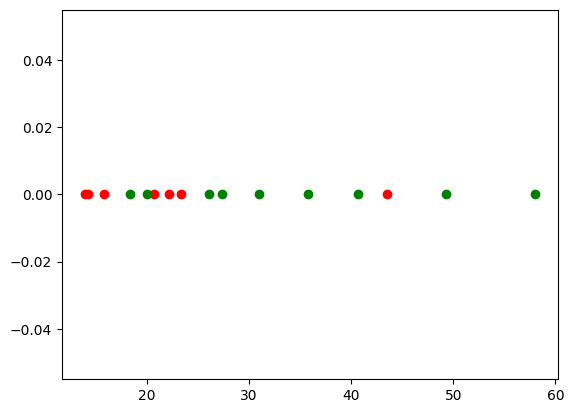

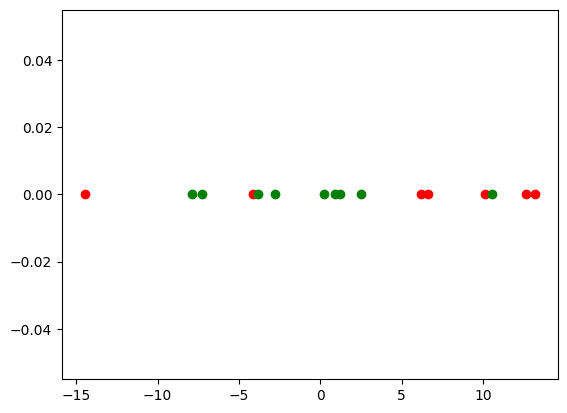

In [148]:
path_poze = r"C:\Users\maria\Documents\GitHub\Labs-IVOM\haar_1\haar_1\Mici_1"
poze = os.listdir(path_poze)
print(poze)

lista_haar_3v_array, lista_haar_T_intors_array = calc_lista_haar_poze(path_poze)
print(lista_haar_3v_array)
print(lista_haar_T_intors_array)

print(np.shape(lista_haar_3v_array))
print(np.shape(lista_haar_T_intors_array))

# creeaza a doua axa pentru figura
nr_imagini = 16 
y = np.zeros(nr_imagini)

#ploteaza intr-o figura valorile haar pt fete cu verde si non-fete cu rosu
plt.figure() 
plt.scatter(lista_haar_3v_array[0:7], y[0:7], color='r')
plt.scatter(lista_haar_3v_array[7:16], y[7:16], color='g')

plt.figure() 
plt.scatter(lista_haar_T_intors_array[0:7], y[0:7], color='r')
plt.scatter(lista_haar_T_intors_array[7:16], y[7:16], color='g')

In [149]:
# Ex 3

In [150]:
#functie pentru caluclul performnatei tp,tn,fp,fn
def performanta(predictie_haar, ref):
    
    nr_imagini_nonfete = 9
    nr_imagini_fete = 7 
    #Parameters : etichete_referinta, trasaturi_haar, nr_poze
    tp= np.logical_and(predictie_haar==1, ref==1).sum()/nr_imagini_fete
    fn= np.logical_and(predictie_haar==0, ref==1).sum()/nr_imagini_fete
    tn= np.logical_and(predictie_haar==0, ref==0).sum()/nr_imagini_nonfete
    fp= np.logical_and(predictie_haar==1, ref==0).sum()/nr_imagini_nonfete

    return tp, fn, tn, fp

In [151]:
# Verificare
a= [[1,5,6,1],[2,4,3,2],[3,1,8,3],[4,9,4,9]] 

img_integrala = img_integrala(a,1)
print(img_integrala)

zn1,za1,za2,H_3V=haar_3V(0,2,3,2,img_integrala)
print(zn1,za1,za2,H_3V)

zn1,zn2,za1,za2,H_T_intors=haar_T_intors(2,1,2,3,img_integrala)
print(zn1,zn2,za1,za2,H_T_intors)

[[ 1  6 12 13]
 [ 3 12 21 24]
 [ 6 16 33 39]
 [10 29 50 65]]
5 7 11 13
10 9 7 12 0


In [152]:
# Ex 3
ref = y
ref[0:7] = 1

prag_bun = np.uint32(np.min(lista_haar_3v_array))
tp_max = 0
tn_max = 0

print(np.uint32(np.min(lista_haar_3v_array)))
print(np.uint32(np.max(lista_haar_3v_array)))

# alegem trasatura haar 3V (cea mai buna)
for prag in range(np.uint32(np.min(lista_haar_3v_array)), np.uint32(np.max(lista_haar_3v_array))):
    pred_haar = (lista_haar_3v_array > prag)
    tp,fn,tn,fp = performanta(pred_haar, ref)

    if tp > tp_max and tn > tn_max:
        tp_max = tp
        tn_max = tn
        prag_bun = prag

print("Prag bun: ", prag_bun)
print("TP max: ", tp_max)
print("TN max: ", tn_max)

13
58
Prag bun:  19
TP max:  0.5714285714285714
TN max:  0.1111111111111111


In [153]:
# pentru haar T intors  
#  
prag_bun = int(np.floor(np.min(lista_haar_T_intors_array)))
print(prag_bun)
tp_max = 0.1
tn_max = 0.1

print(int(np.floor(np.min(lista_haar_T_intors_array))))
print(int(np.ceil(np.max(lista_haar_T_intors_array))))

# alegem trasatura haar 3V
for prag in range(int(np.floor(np.min(lista_haar_T_intors_array))), int(np.ceil(np.max(lista_haar_T_intors_array)))):
    pred_haar = (lista_haar_T_intors_array > prag)
    tp,fn,tn,fp = performanta(pred_haar, ref)

    if tp > tp_max and tn > tn_max:
        tp_max = tp
        tn_max = tn
        prag_bun = prag

print("Prag bun: ", prag_bun)
print("TP max: ", tp_max)
print("TN max: ", tn_max)

-15
-15
14
Prag bun:  -7
TP max:  0.8571428571428571
TN max:  0.2222222222222222


Ex 4

In  ce  conditii  este  descriptorul  LBP  invariant  la  iluminare.  De  ce  nu  este  invariant  in  orice situatie? 

Descriptorul LBP este invariant la iluminare in cazul in care iluminarea este constanta pe intrega portiune de interes, in acest caz toti pixelii vor creste cu aceeasi intensitate, comparatiile ramanand identice.
Nu este invariant in orice situatie, deoarece daca ne aflam la un contur, iar iluminarea se petrece doar pe o jumatate din zona de interes atunci pixelii se vor modifica doar pe acea portiune, avand alt descriptor LBP decat cel calculat anterior.